# Descargar dataset

In [1]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content'

In [3]:
!kaggle datasets download -d shreyapmaher/fruits-dataset-images

 94% 193M/205M [00:01<00:00, 115MB/s]
100% 205M/205M [00:02<00:00, 107MB/s]


In [4]:
import zipfile

archivo_zip = '/content/fruits-dataset-images.zip'

with zipfile.ZipFile(archivo_zip, 'r') as zip_ref:
    zip_ref.extractall('/content')

# Procesar dataset

In [5]:
import os
from sklearn.model_selection import train_test_split
import cv2

directory = '/content/images'

sub_folders = os.listdir(directory)

X = []
y = []

fruits_labels_dict = {}

IMG_width = 224
IMG_height = 224

i = 0

for sub_folder in sub_folders:
    folder_root = os.path.join(directory, sub_folder)
    fruits_labels_dict[i] = sub_folder
    if os.path.isdir(folder_root):
        images = os.listdir(folder_root)
        for image in images:
          img_root = os.path.join(folder_root, image)
          img = cv2.imread(img_root)
          if img is not None:
            resized_img = cv2.resize(img, (IMG_width, IMG_height))
            X.append(resized_img)
            y.append(i)
        i+=1


In [16]:
from sklearn.model_selection import train_test_split
import numpy as np

X = np.array(X)
y = np.array(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Grapes


<function matplotlib.pyplot.show(close=None, block=None)>

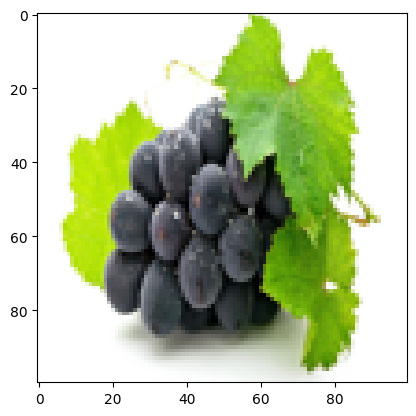

In [7]:
from PIL import Image
import matplotlib.pyplot as plt

path = '/content/images/grapes fruit/Image_1.jpg'
img = Image.open(path)
img = img.resize((100, 100))
print("Grapes")
plt.imshow(img)
plt.show

In [8]:
import pandas as pd

print (X_train.shape, y_train.shape, X_test.shape, y_test.shape)
print ("\ndistribution of train classes")
print (pd.Series(y_train).value_counts())
print ("\ndistribution of test classes")
print (pd.Series(y_test).value_counts())

(287, 224, 224, 3) (287,) (72, 224, 224, 3) (72,)

distribution of train classes
1    38
3    36
6    35
2    32
8    31
4    29
0    29
7    29
5    28
dtype: int64

distribution of test classes
5    12
0    11
7    11
4    11
8     9
2     7
6     5
3     4
1     2
dtype: int64


# Modelo 1

In [9]:
from keras.layers.attention.multi_head_attention import activation
import tensorflow as tf
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, Dense, Flatten, MaxPool2D, Dropout, MaxPooling2D

model = Sequential()
model.add(Conv2D(filters=64, kernel_size=(2,2), activation='relu', input_shape=X_train.shape[1:]))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(2,2), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(2,2), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))


model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.25))

model.add(Dense(9, activation='softmax'))

In [10]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [17]:
y_train = to_categorical(y_train, 9)
y_test2 = to_categorical(y_test, 9)

In [18]:
epochs = 10
history = model.fit(
    X_train,
    y_train,
    epochs=epochs,
    batch_size=64
)

Epoch 1/10
5/5 [==============================] - 30s 6s/step - loss: 0.8275 - accuracy: 0.7422
Epoch 2/10
5/5 [==============================] - 29s 6s/step - loss: 0.4084 - accuracy: 0.8711
Epoch 3/10
5/5 [==============================] - 29s 6s/step - loss: 0.2959 - accuracy: 0.9094
Epoch 4/10
5/5 [==============================] - 38s 8s/step - loss: 0.2045 - accuracy: 0.9338
Epoch 5/10
5/5 [==============================] - 30s 5s/step - loss: 0.1775 - accuracy: 0.9547
Epoch 6/10
5/5 [==============================] - 30s 6s/step - loss: 0.1037 - accuracy: 0.9686
Epoch 7/10
5/5 [==============================] - 29s 6s/step - loss: 0.0678 - accuracy: 0.9826
Epoch 8/10
5/5 [==============================] - 29s 6s/step - loss: 0.0718 - accuracy: 0.9826
Epoch 9/10
5/5 [==============================] - 29s 5s/step - loss: 0.1312 - accuracy: 0.9756
Epoch 10/10
5/5 [==============================] - 30s 6s/step - loss: 0.0832 - accuracy: 0.9791


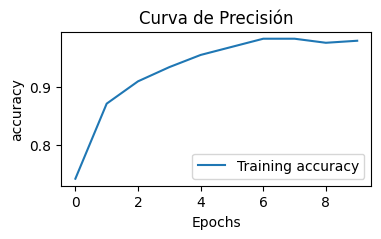

In [19]:
import matplotlib.pyplot as plt

accuracy = history.history['accuracy']

plt.figure(figsize=(4, 2))
plt.plot(accuracy, label='Training accuracy')
plt.title('Curva de Precisión')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

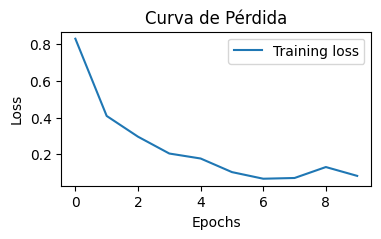

In [20]:
import matplotlib.pyplot as plt

loss = history.history['loss']

plt.figure(figsize=(4, 2))
plt.plot(loss, label='Training loss')
plt.title('Curva de Pérdida')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Modelo 2

In [28]:
from keras.layers import MaxPooling2D

model2 = Sequential()
model2.add(Conv2D(32, (3, 3), activation='relu', input_shape=X_train.shape[1:]))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Conv2D(64, (3, 3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Conv2D(128, (3, 3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Flatten())

model2.add(Dense(256, activation='relu'))
model2.add(Dropout(0.5))

model2.add(Dense(9, activation='softmax'))

In [29]:
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [30]:
epochs = 10
history2 = model2.fit(
    X_train,
    y_train,
    epochs=epochs,
    batch_size=64
)

Epoch 1/10
5/5 [==============================] - 32s 6s/step - loss: 553.2646 - accuracy: 0.0767
Epoch 2/10
5/5 [==============================] - 30s 6s/step - loss: 9.3464 - accuracy: 0.2195
Epoch 3/10
5/5 [==============================] - 31s 6s/step - loss: 1.7612 - accuracy: 0.3728
Epoch 4/10
5/5 [==============================] - 39s 6s/step - loss: 1.3137 - accuracy: 0.5923
Epoch 5/10
5/5 [==============================] - 31s 6s/step - loss: 0.8577 - accuracy: 0.7875
Epoch 6/10
5/5 [==============================] - 31s 6s/step - loss: 0.3997 - accuracy: 0.8990
Epoch 7/10
5/5 [==============================] - 31s 6s/step - loss: 0.2264 - accuracy: 0.9443
Epoch 8/10
5/5 [==============================] - 31s 6s/step - loss: 0.2412 - accuracy: 0.9268
Epoch 9/10
5/5 [==============================] - 32s 6s/step - loss: 0.2551 - accuracy: 0.9408
Epoch 10/10
5/5 [==============================] - 30s 6s/step - loss: 0.3712 - accuracy: 0.9199


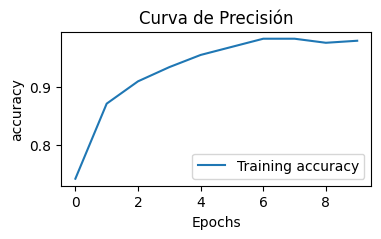

In [31]:
import matplotlib.pyplot as plt

accuracy = history.history['accuracy']

plt.figure(figsize=(4, 2))
plt.plot(accuracy, label='Training accuracy')
plt.title('Curva de Precisión')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

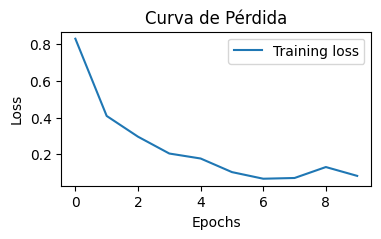

In [32]:
import matplotlib.pyplot as plt

loss = history.history['loss']

plt.figure(figsize=(4, 2))
plt.plot(loss, label='Training loss')
plt.title('Curva de Pérdida')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [21]:
score = model.evaluate(X_test, y_test2, verbose=1)

print("Test Score:", score[0])
print("Test Accuracy:", score[1])

3/3 [==============================] - 2s 484ms/step - loss: 0.6061 - accuracy: 0.9167
Test Score: 0.6060960292816162
Test Accuracy: 0.9166666865348816


In [34]:
score = model2.evaluate(X_test, y_test2, verbose=1)

print("Test Score:", score[0])
print("Test Accuracy:", score[1])

3/3 [==============================] - 3s 893ms/step - loss: 2.2556 - accuracy: 0.4444
Test Score: 2.255617380142212
Test Accuracy: 0.4444444477558136


In [22]:
def get_img(img_url):
    img_fname = img_url.split("/")[-1]
    !wget -nc $img_url
    img = cv2.imread(img_fname)
    resized = cv2.resize(img,(IMG_width,IMG_height))
    three_dimensions = np.expand_dims(resized, axis=0)
    return three_dimensions

#Test del modelo 1

In [23]:
test_image = get_img('https://www.frutas-hortalizas.com/img/fruites_verdures/presentacio/14.jpg')
test_image2 = get_img('https://www.ciad.mx/wp-content/uploads/2022/02/316-WEB-NOTA-3-900x450.jpg')
test_image3 = get_img('https://st4.depositphotos.com/1642482/25389/i/600/depositphotos_253890616-stock-photo-cherry-leaf-isolated.jpg')
test_image4 = get_img('https://cdn.portalfruticola.com/2021/12/uva-de-mesa.jpg')

--2023-06-01 06:24:22--  https://www.frutas-hortalizas.com/img/fruites_verdures/presentacio/14.jpg
Resolving www.frutas-hortalizas.com (www.frutas-hortalizas.com)... 80.67.99.11
Connecting to www.frutas-hortalizas.com (www.frutas-hortalizas.com)|80.67.99.11|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 84210 (82K) [image/jpeg]
Saving to: ‘14.jpg’

14.jpg              100%[===================>]  82.24K   418KB/s    in 0.2s    

2023-06-01 06:24:22 (418 KB/s) - ‘14.jpg’ saved [84210/84210]

--2023-06-01 06:24:22--  https://www.ciad.mx/wp-content/uploads/2022/02/316-WEB-NOTA-3-900x450.jpg
Resolving www.ciad.mx (www.ciad.mx)... 200.23.35.13
Connecting to www.ciad.mx (www.ciad.mx)|200.23.35.13|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 69182 (68K) [image/jpeg]
Saving to: ‘316-WEB-NOTA-3-900x450.jpg’

316-WEB-NOTA-3-900x 100%[===================>]  67.56K   261KB/s    in 0.3s    

2023-06-01 06:24:23 (261 KB/s) - ‘316-WEB-NOTA-3-900x

In [24]:
results_predicted = model.predict(test_image)
results_predicted2 = model.predict(test_image2)
results_predicted3 = model.predict(test_image3)
results_predicted4 = model.predict(test_image4)

predicted_class = np.argmax(results_predicted)
predicted_class2 = np.argmax(results_predicted2)
predicted_class3 = np.argmax(results_predicted3)
predicted_class4 = np.argmax(results_predicted4)

class_name = fruits_labels_dict.get(predicted_class)
class_name2 = fruits_labels_dict.get(predicted_class2)
class_name3 = fruits_labels_dict.get(predicted_class3)
class_name4 = fruits_labels_dict.get(predicted_class4)

1/1 [==============================] - 0s 46ms/step


kiwi fruit


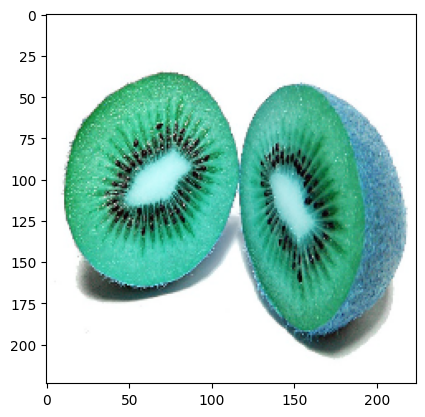

In [25]:
plt.imshow(test_image[0])
print(class_name)

chickoo fruit


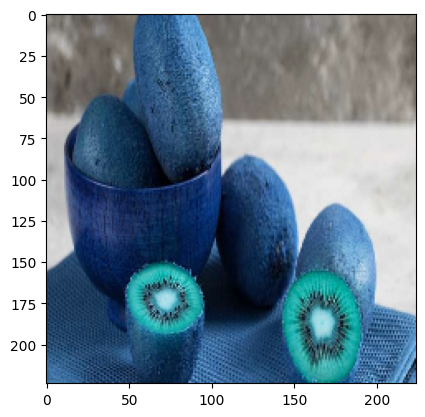

In [26]:
plt.imshow(test_image2[0])
print(class_name2)

cherry fruit


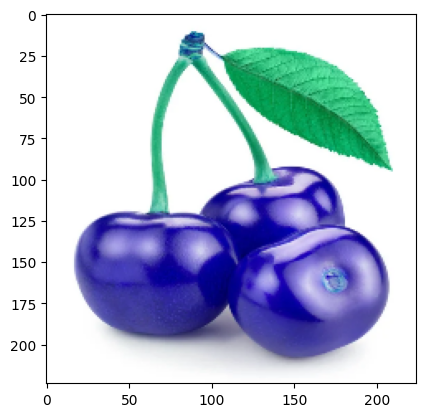

In [27]:
plt.imshow(test_image3[0])
print(class_name3)

grapes fruit


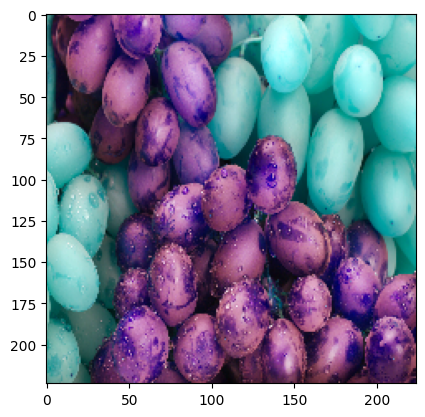

In [61]:
plt.imshow(test_image4[0])
print(class_name4)

# Test del modelo 2

In [35]:
results_predicted = model2.predict(test_image)
results_predicted2 = model2.predict(test_image2)
results_predicted3 = model2.predict(test_image3)
results_predicted4 = model2.predict(test_image4)

predicted_class = np.argmax(results_predicted)
predicted_class2 = np.argmax(results_predicted2)
predicted_class3 = np.argmax(results_predicted3)
predicted_class4 = np.argmax(results_predicted4)

class_name = fruits_labels_dict.get(predicted_class)
class_name2 = fruits_labels_dict.get(predicted_class2)
class_name3 = fruits_labels_dict.get(predicted_class3)
class_name4 = fruits_labels_dict.get(predicted_class4)

1/1 [==============================] - 0s 58ms/step


chickoo fruit


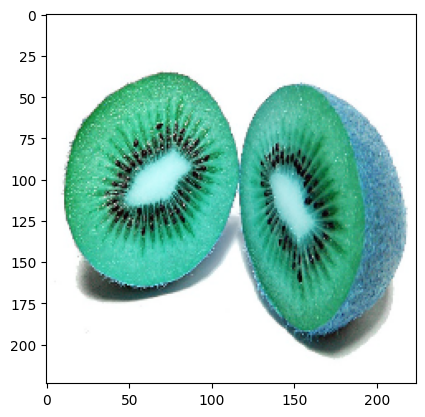

In [36]:
plt.imshow(test_image[0])
print(class_name)

chickoo fruit


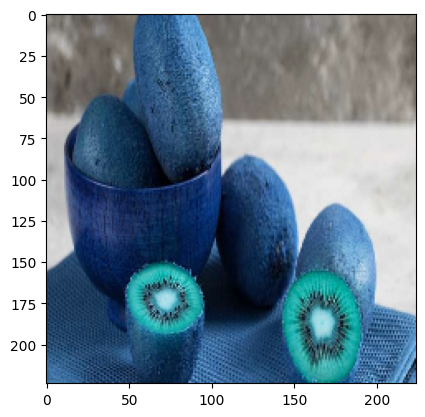

In [37]:
plt.imshow(test_image2[0])
print(class_name2)

strawberry fruit


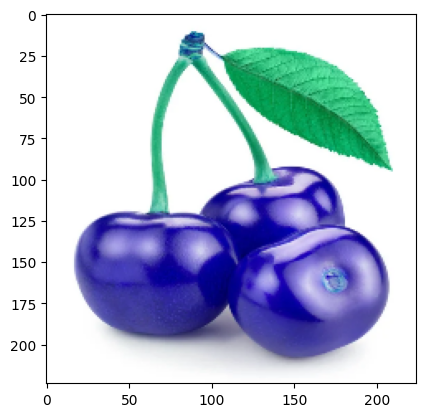

In [38]:
plt.imshow(test_image3[0])
print(class_name3)

cherry fruit


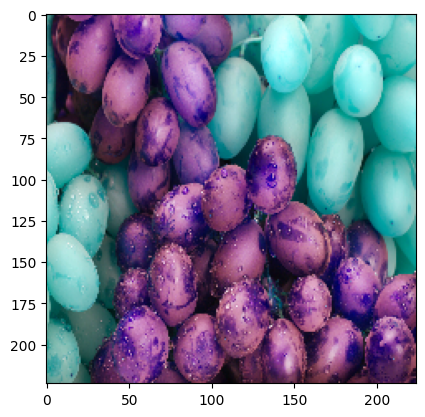

In [39]:
plt.imshow(test_image4[0])
print(class_name4)